In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df=pd.read_csv('customer_churn_tree_svm.csv')
df

,monthly_charges,tenure_months,contract_type,support_calls,churn
0,51.18,15,2,5,0
1,71.09,42,1,2,0
2,33.36,4,0,0,0
3,33.87,51,0,5,0
4,21.10,34,0,5,0
...,...,...,...,...,...
145,46.35,45,1,6,0
146,36.30,15,0,1,0
147,62.03,37,0,11,0
148,61.74,17,2,0,0


monthly_charges    0
tenure_months      0
contract_type      0
support_calls      0
churn              0
dtype: int64
(150, 5)
(8, 5)
(142, 5)
     monthly_charges  tenure_months  contract_type  support_calls
13             91.04             18              0              3
53             55.78              7              0              7
55             73.93              5              0              9
59             89.11             19              0             10
82             56.67             13              0             10
111            71.03              1              0             11
135            68.60              2              0              8
137            71.01              3              0              9


<Axes: >

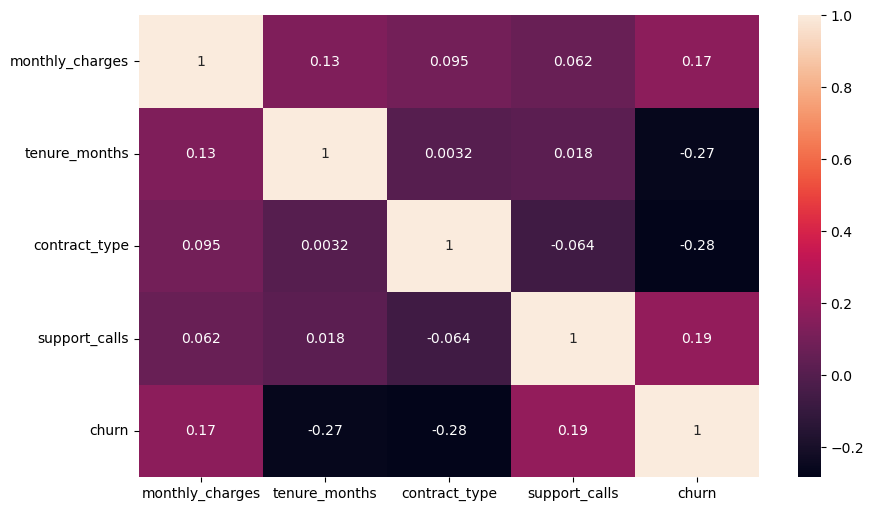

In [2]:
a=df.isnull().sum()
print(a)
b=df.shape
print(b)
c=df[df['churn']==1].shape
print(c)
d=df[df['churn']==0].shape
print(d)
churned_customers = df[df["churn"] == 1][["monthly_charges", "tenure_months", "contract_type", "support_calls"]]

print(churned_customers)


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

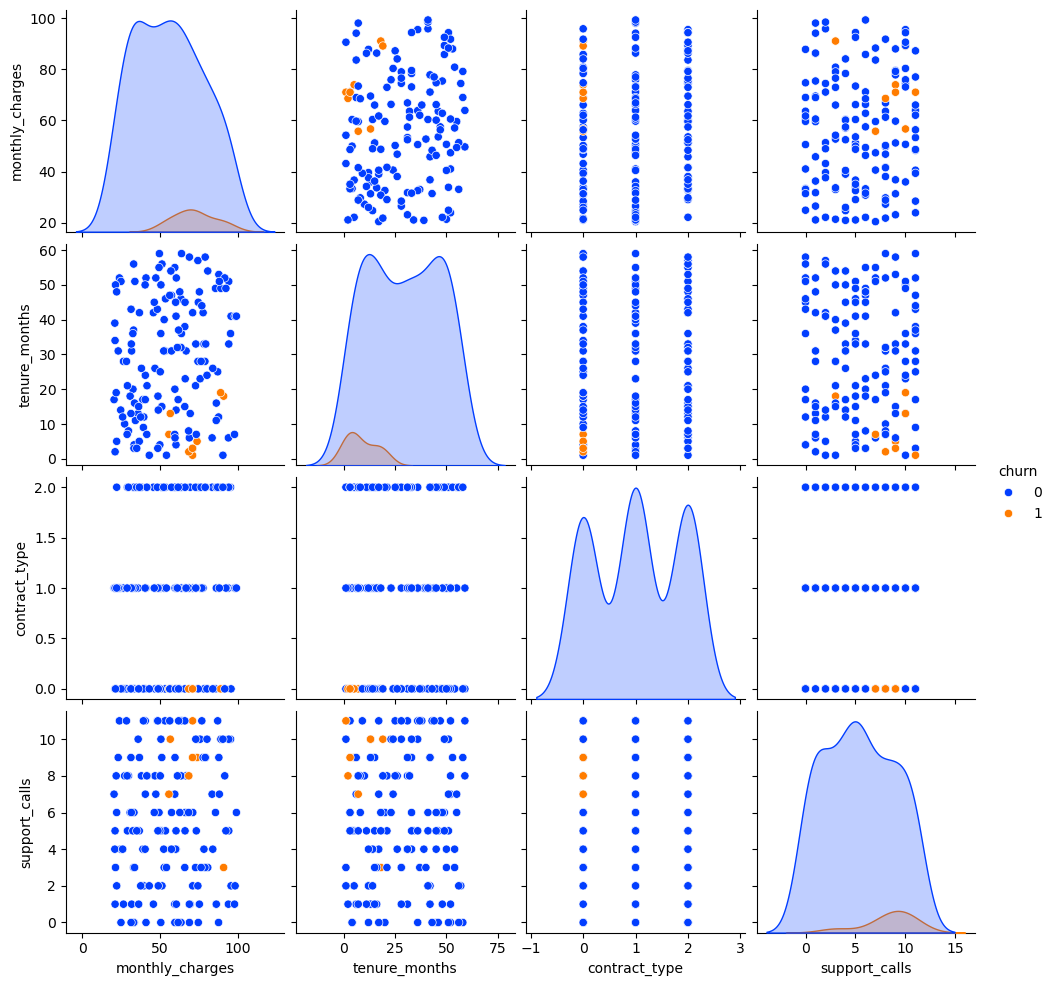

In [3]:
import seaborn as sns
sns.pairplot(df,hue='churn',palette='bright')

In [4]:
X = df[["monthly_charges", "tenure_months", "contract_type", "support_calls"]]
y = df["churn"]

In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline  
from sklearn.svm import SVC
model = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", SVC(kernel="linear", C=1.0, random_state=42)) 
])
param_grid = {
    "svc__C": [0.1, 1, 10, 100],
    "svc__kernel": ["linear", "rbf", "poly"],  
    
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))





[[28  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30



In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))


[[28  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



c:\Users\nk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


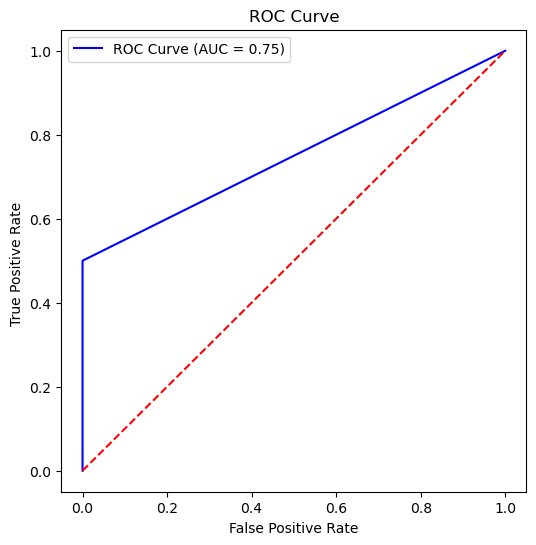

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc_score = roc_auc_score(y_test, y_pred)


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.title("ROC Curve")
plt.legend()
plt.show()

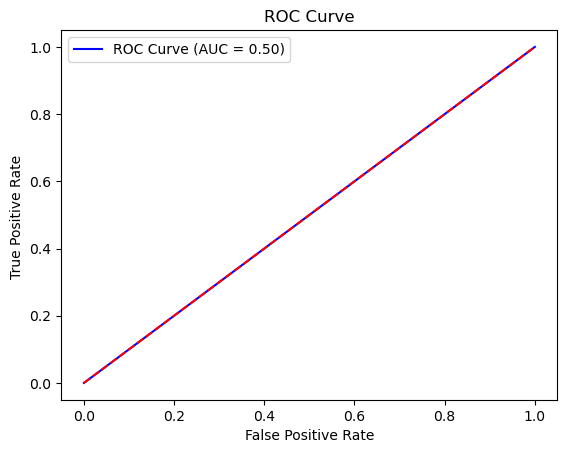

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, dt_y_pred)


auc_score = roc_auc_score(y_test, dt_y_pred)

# Plotplt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color="red", linestyle="--")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [9]:

input_data = {"monthly_charges":71.35,
              "tenure_months":42,
              "contract_type":1,
              "support_calls":2}

user_df = pd.DataFrame([input_data]) 

prediction = model.predict(user_df)[0]
print("Predicted Churn:", prediction)


Predicted Churn: 0
